## **Reducing Dimensions for Numeric Variables**

* correlation matrices and heatmaps can help identify redundancy (linear)
* principal component analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [2]:
## check for missing values
df.isna().sum()

,0
name,0
mfr,0
type,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,0
sugars,0


In [4]:
## correlation matrix
## p x p matrix (symmetric) with pairwise correlation values
df.select_dtypes('number').corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


<Axes: >

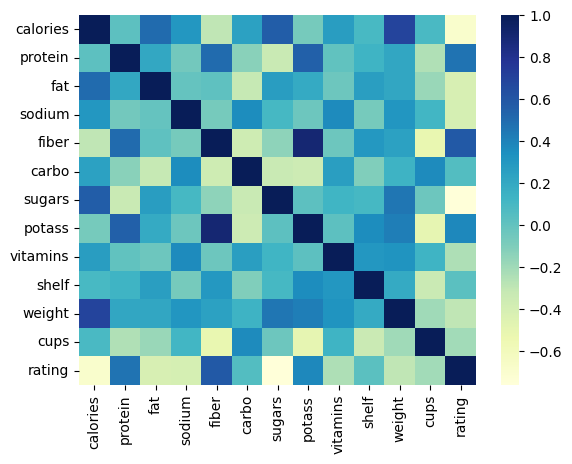

In [6]:
## heatmap is a visual approach

## 1) save the correlation matrix
corrmat = df.select_dtypes('number').corr()

## 2) seaborn (heatmap)
sns.heatmap(corrmat, cmap = "YlGnBu")

## **Singular Value Decomposition (SVD)**

One of the most used algorithms in data science.

* page rank (google, facebook, ...)
* recommendation systems (netflix, ...)
* dimension reduction (compression, ...)

In [7]:
## create X matrix
X = df.select_dtypes('number')

In [9]:
## shape
## 13 predictor (calories, protein, ...)
X.shape

(77, 13)

In [10]:
## SVD for matrix X
## this is guaranteed to work
U, S, V = np.linalg.svd(X)

In [12]:
## U is going to have columns that are combinations of the 13 variables
## 1st column of U contains the most important information
## C1 > C2 > C3 > ....
## obs are just cereals
pd.DataFrame(U)

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,-0.129879,0.265631,-0.176881,0.000073,-0.104662,0.217281,-0.054376,0.080253,0.077720,0.059083,...,-0.069226,-0.189512,-0.100878,-0.189179,-0.155809,0.008910,-0.060464,-0.098063,-0.102824,-0.076162
1,-0.063477,0.170911,0.172526,-0.073890,0.177335,-0.077479,-0.177153,0.201234,-0.149838,-0.096426,...,0.343228,-0.046997,-0.047448,-0.154108,0.013367,-0.082160,-0.133380,0.081132,-0.006633,0.029677
2,-0.185535,0.211523,-0.366813,-0.041286,-0.046606,0.100615,-0.018129,0.012331,-0.151589,-0.085336,...,0.039437,0.141035,0.065524,0.007673,0.001288,0.012482,0.107519,-0.040646,0.006249,0.031808
3,-0.141873,0.324653,-0.262345,-0.026405,-0.281573,0.179781,-0.017329,0.182430,0.316369,0.077408,...,0.092524,-0.008095,-0.036687,0.012664,-0.136374,0.071473,0.028186,-0.060013,-0.073292,0.003658
4,-0.102541,-0.146970,0.074648,-0.048709,-0.021358,0.127500,-0.091908,0.254901,0.051535,0.195119,...,-0.283885,0.175916,-0.099883,0.097681,0.012022,-0.229990,-0.008487,-0.056553,0.002926,-0.049945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,-0.134368,-0.109103,-0.032955,-0.069648,-0.027565,-0.173608,0.039359,0.126582,-0.161043,-0.026753,...,0.002101,0.041748,-0.046496,-0.026263,0.004056,0.859087,0.000779,-0.037947,-0.008188,-0.023439
73,-0.085369,-0.068594,0.113672,-0.005607,0.052918,0.127189,0.073943,0.046142,0.007959,-0.044118,...,0.038073,-0.044054,-0.004515,-0.027902,-0.006417,0.009633,0.951652,0.019878,-0.004730,0.000641
74,-0.137197,-0.022583,-0.077859,-0.061989,-0.069641,-0.063486,-0.022925,-0.093865,0.059563,-0.064367,...,-0.014470,0.005903,-0.055578,-0.003823,-0.035190,-0.023427,0.014475,0.912895,-0.053615,-0.065109
75,-0.125234,-0.004871,-0.038005,-0.051392,-0.079129,-0.061205,-0.017271,-0.093812,0.075739,-0.060373,...,-0.031072,-0.024461,-0.037715,-0.019937,-0.038790,0.005636,0.009837,-0.058254,0.937587,-0.035993


In [13]:
## V is the recipe (weights) of each variable to construct each column of U
pd.DataFrame(V)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.445942,-0.010703,-0.004305,-0.752220,-0.009755,-0.060865,-0.029163,-0.430612,-0.126970,-0.009157,-0.004317,-0.003328,-0.169872
1,0.036003,0.009027,0.002859,-0.525695,0.025494,-0.013520,0.002936,0.837198,-0.034579,0.005458,0.001205,-0.000661,0.138885
2,0.810390,0.011403,0.008321,-0.387013,-0.017222,0.104537,0.055414,-0.315489,0.101020,0.013297,0.006260,0.006913,0.262663
3,-0.062950,-0.006630,-0.000903,-0.083997,-0.005001,-0.022188,0.026382,0.031985,0.959391,0.009097,-0.000605,-0.001405,-0.257264
4,0.346235,-0.020429,0.032272,-0.023889,-0.029750,-0.145802,0.178064,0.103737,-0.225478,-0.006494,-0.000384,-0.005791,-0.873249
5,-0.047198,-0.026074,-0.032756,0.017561,0.096893,-0.632286,0.731453,-0.038044,0.024197,0.025606,0.008133,0.009803,0.220598
6,-0.114193,-0.222306,-0.204979,-0.008740,-0.039573,0.718180,0.613120,0.017912,-0.020109,0.004333,0.009718,0.014303,-0.033765
7,-0.003612,-0.451322,0.404727,0.000755,0.329452,0.026285,-0.042437,-0.009617,-0.007211,0.720091,-0.011116,-0.051392,-0.004492
8,0.041966,-0.295691,-0.228244,-0.003419,0.807307,-0.009990,-0.109011,-0.016130,0.003198,-0.436317,0.016057,-0.055205,-0.031988
9,-0.022076,0.797386,-0.061535,-0.002501,0.454127,0.158235,0.106336,-0.014770,-0.009418,0.317961,-0.013894,-0.114652,-0.050742


In [14]:
## S is going to contain how much information each column gives you
S

array([2.04056981e+03, 6.68191257e+02, 3.42850787e+02, 1.78836823e+02,
       1.45438333e+02, 2.83902503e+01, 2.05874565e+01, 7.07686297e+00,
       6.63230151e+00, 4.87772842e+00, 4.63566000e+00, 1.59697948e+00,
       5.82643665e-01])

In [ ]:
## cat img is 703 x 463 pixels
## 703 obs and 463 variables

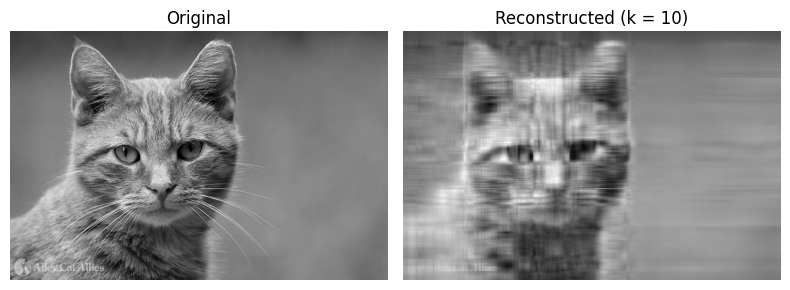

In [17]:
## This code illustrates the use of Singular Value Decomposition
## We compress an image using the singular values

import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io

# Load an image from a URL or a file path
image = io.imread('/content/FELV-cat.jpg')

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Perform Singular Value Decomposition
U, S, V = np.linalg.svd(gray_image, full_matrices=False)

# Reconstruct the image using only the first k singular values
def reconstruct_image(U, S, V, k):
    S_k = np.diag(S[:k])  # Keep only the first k singular values
    U_k = U[:, :k]        # First k columns of U
    V_k = V[:k, :]        # First k rows of V
    return np.dot(U_k, np.dot(S_k, V_k))

# Number of singular values to use for the reconstruction
k = 10  # You can change this value to see how it affects the reconstruction

# Reconstruct the image using k singular values
reconstructed_image = reconstruct_image(U, S, V, k)

# Plot the original and reconstructed image
plt.figure(figsize=(8, 4))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f'Reconstructed (k = {k})')
plt.axis('off')

plt.tight_layout()
plt.show()

## **Principal Component Analysis (PCA)**

SVD used on the covariance matrix. We still decompose the matrix into 3 (USV).

In [19]:
from sklearn.decomposition import PCA

## instance
pca = PCA() ## select k (n_component)

## new matrix PC. This will be the U matrix
PC = pca.fit_transform(X)

In [20]:
## shape of PC is the same as X
PC.shape, X.shape

((77, 13), (77, 13))

In [21]:
## Columns of PC are the columns of U
## PC1 > PC2 > ... > PC13
PC_df = pd.DataFrame(PC, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])

<Axes: >

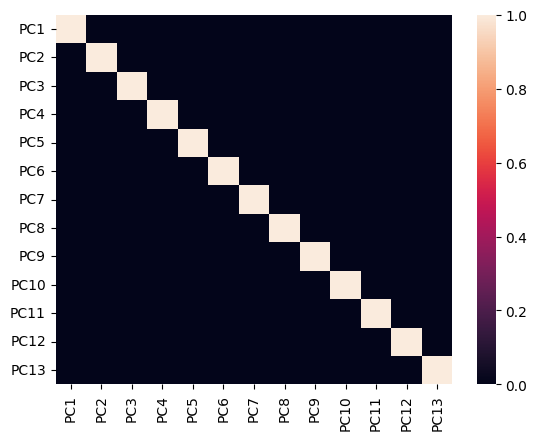

In [24]:
sns.heatmap(PC_df.corr())

In [26]:
## correlations with PCs are zero
## PC1 > PC2 but PC2 contains information that PC1 does not have
## we also the recipe to create each PC (matrix V)
## we have how much information has been kept by each column (matrix S)
## PC1 keeps 54.4% of the information of all 13 variables
## PC1 and PC2 keep 92.9% of the information
np.cumsum( pca.explained_variance_ratio_)

array([0.54380618, 0.92876465, 0.96661119, 0.99350765, 0.99913507,
       0.99956162, 0.99989015, 0.99993919, 0.99997568, 0.99999709,
       0.99999966, 1.        , 1.        ])

In [28]:
## Suppose you want a smaller dataset that keeps at least 95% of the information
PC_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-54.214258,181.272990,-23.955155,20.990477,-8.464835,-2.075775,2.944157,0.739920,-0.057060,0.293992,-0.077773,-0.018641,-3.607114e-08
1,-147.719832,21.121681,12.629972,-32.449022,-6.273388,-2.587608,-4.910144,0.933936,0.443407,1.259792,0.329155,0.082644,-1.687258e-09
2,70.001938,234.813890,-38.481557,15.900259,-13.988677,-0.255853,-1.309340,-0.294721,0.406944,-0.119475,-0.125359,-0.045175,-5.093777e-08
3,-53.176474,233.852349,-44.841713,40.422434,2.367963,-1.586648,4.595537,1.944452,-0.974550,0.385135,0.212409,0.009350,6.520315e-08
4,50.587985,-92.306498,-6.076981,-3.043775,-0.706591,-2.631723,2.436350,1.926933,0.741866,0.566801,-0.051923,0.077135,3.021051e-08


In [29]:
## main disadvantage: PCs are combinations of variables
## works well with text, images,

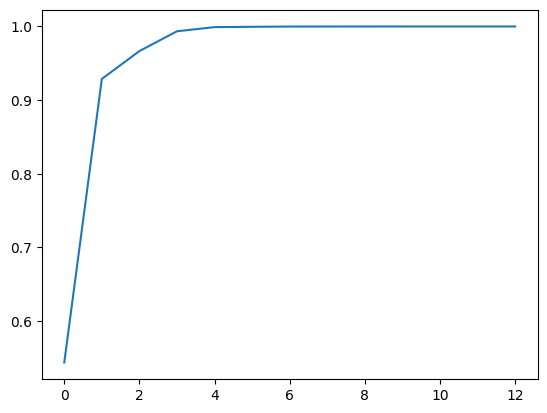

In [30]:
## how do you select how many PCs to keep?
## plot the explained variations
## elbow method
plt.plot(np.cumsum( pca.explained_variance_ratio_))

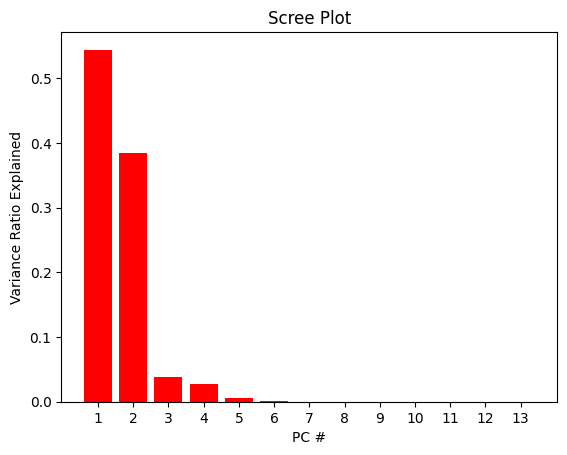

In [31]:
## scree plot
## boxplot of the explained variation
## scree plot
import matplotlib.pyplot as plt

features = np.array(range(pca.n_components_))+1
plt.bar(features, pca.explained_variance_ratio_, color = 'red')
plt.title("Scree Plot")
plt.xlabel('PC #')
plt.ylabel('Variance Ratio Explained')
plt.xticks(features)
plt.show()

In [35]:
df['name']

,name
0,100% Bran
1,100% Natural Bran
2,All-Bran
3,All-Bran with Extra Fiber
4,Almond Delight
...,...
72,Triples
73,Trix
74,Wheat Chex
75,Wheaties


In [40]:
PC_df.iloc[:,0:3]

,PC1,PC2,PC3
0,-54.214258,181.272990,-23.955155
1,-147.719832,21.121681,12.629972
2,70.001938,234.813890,-38.481557
3,-53.176474,233.852349,-44.841713
4,50.587985,-92.306498,-6.076981
...,...,...,...
72,92.949959,-26.128720,-13.328371
73,-10.669874,-73.744945,5.643874
74,65.730080,27.075888,-18.573972
75,36.639902,18.877192,-15.029127


In [42]:
import plotly.express as px

#df.reset_index(inplace = True) # to avoid different indices
PCdf = pd.concat([df['name'], PC_df.iloc[:,0:3]], axis = 1)

fig = px.scatter(PCdf, x="PC1", y="PC2", text="name", log_x=False, size_max=100, color="name")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Cereal Brands and Principal Components', title_x=0.5)
fig.show()